# Importing the necessary libraries

In [1]:
from __future__ import print_function, division

import os
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
import seaborn as sn
import tensorflow as tf
from keras.datasets import cifar10
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, LeakyReLU
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, UpSampling2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam

2024-07-29 14:59:52.579884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loading And Preprocessing Cifar-10

In [6]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Displaying Shape
print("Shape of Train and Test sets:\n")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Shape of Train and Test sets:

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


# Getting classs labels and details

In [7]:
# Get the class labels
class_labels = np.unique(y_train.argmax(axis=1))
class_names = [str(label) for label in class_labels]  # Convert labels to strings for simplicity

# Count the number of images per class in the training set
train_class_counts = np.sum(y_train, axis=0)
test_class_counts = np.sum(y_test, axis=0)

# Print the number of classes, names of classes, and images per class
print(f"Number of classes: {len(class_labels)}")
print("Class names:", class_names)
print("Number of images per class in the training set:")
for class_label, count in zip(class_labels, train_class_counts):
    print(f"{class_label}: {int(count)}")

print("Number of images per class in the test set:")
for class_label, count in zip(class_labels, test_class_counts):
    print(f"{class_label}: {int(count)}")

Number of classes: 10
Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Number of images per class in the training set:
0: 5000
1: 5000
2: 5000
3: 5000
4: 5000
5: 5000
6: 5000
7: 5000
8: 5000
9: 5000
Number of images per class in the test set:
0: 1000
1: 1000
2: 1000
3: 1000
4: 1000
5: 1000
6: 1000
7: 1000
8: 1000
9: 1000


# Displaying Images from dataset

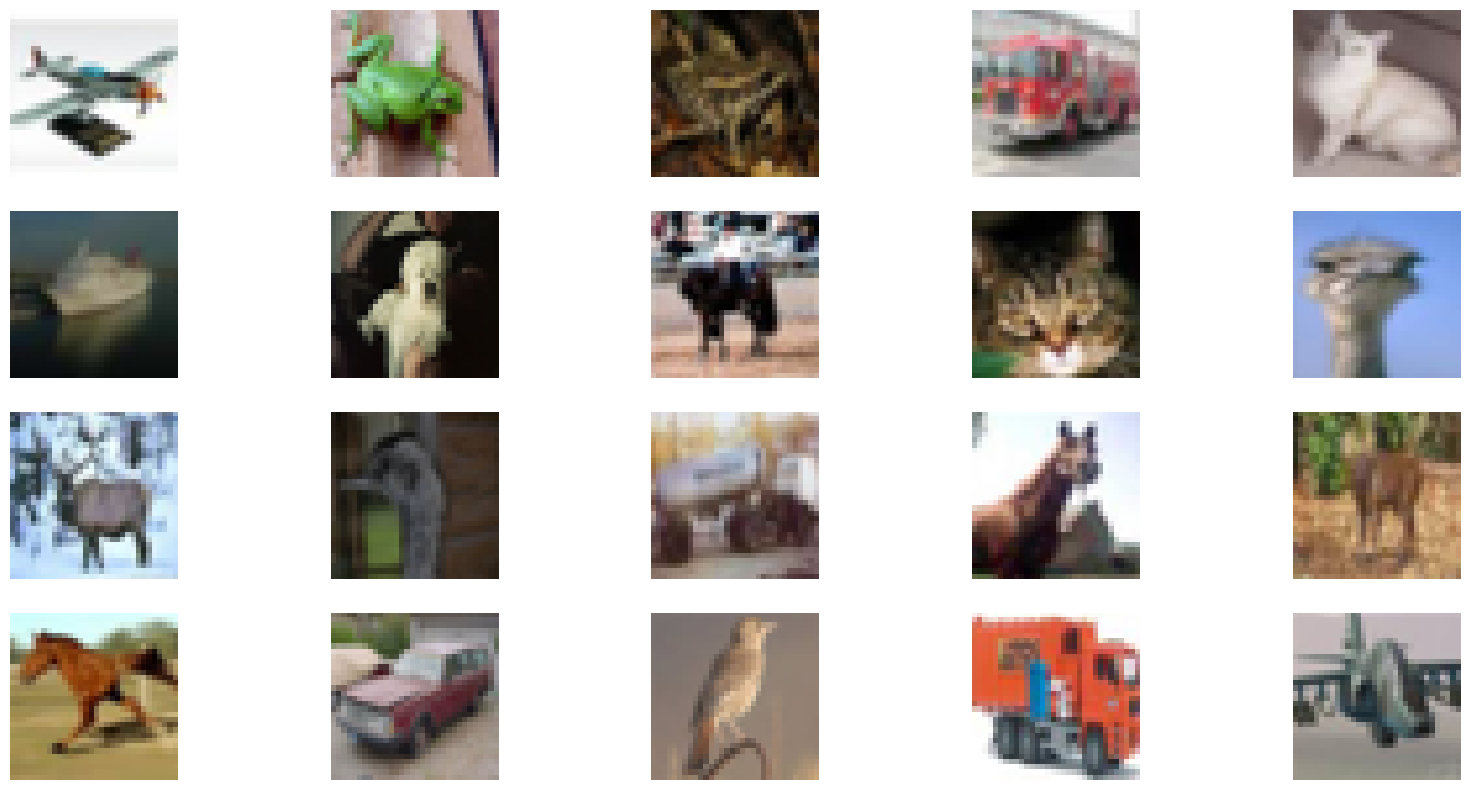

In [8]:
# Function to display random images
def display_random_images(x_data, y_data, num_images=20, rows=4, cols=5):
    # Select random indices
    indices = np.random.randint(0, x_data.shape[0], size=num_images)

    # Display images
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    for i, index in enumerate(indices):
        img = x_data[index]
        r = i // cols
        c = i % cols
        axes[r, c].imshow(img)
        axes[r, c].axis('off')
    plt.show()

# Display 20 random images from the CIFAR-10 dataset in a 4x5 grid
display_random_images(x_train, y_train, num_images=20, rows=4, cols=5)

# Convolutional Neural Network

In [9]:
# Assuming y_train and y_test are in the shape [batch_size, num_classes]
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [10]:
# Define CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

2024-07-29 15:04:21.605698: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Compiling the model

In [11]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## training The model

In [12]:
#Training the model
cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 82s 51ms/step - loss: 1.5270 - accuracy: 0.4457 - val_loss: 1.2790 - val_accuracy: 0.5426
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.1729 - accuracy: 0.5824 - val_loss: 1.1042 - val_accuracy: 0.6045
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0331 - accuracy: 0.6362 - val_loss: 1.0390 - val_accuracy: 0.6369
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9414 - accuracy: 0.6680 - val_loss: 0.9747 - val_accuracy: 0.6600
Epoch 5/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8656 - accuracy: 0.6961 - val_loss: 0.9274 - val_accuracy: 0.6756
Epoch 6/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.8034 - accuracy: 0.7192 - val_loss: 0.9252 - val_accuracy: 0.6775
Epoch 7/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.7534 - accuracy: 0.7363 - val_loss: 0.9585 

## Confusion Matrix

313/313 [==============================] - 6s 17ms/step


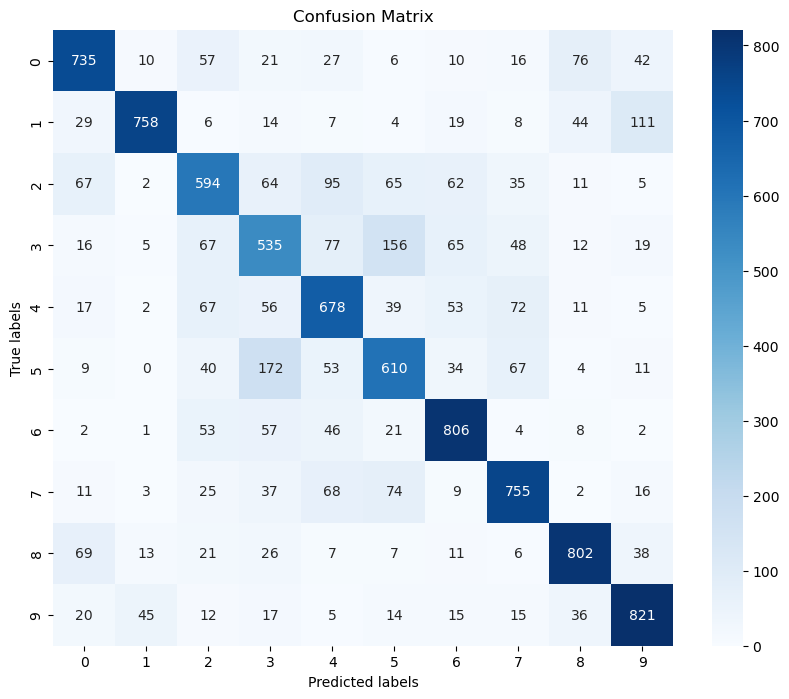

In [13]:
# Assuming model is your trained model
y_probs = cnn_model.predict(x_test)
y_pred = np.argmax(y_probs, axis=1)

# Assuming y_test is the true labels in the format you have them
# If not, you may need to adjust y_test accordingly
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## ROC-AUC CURVE

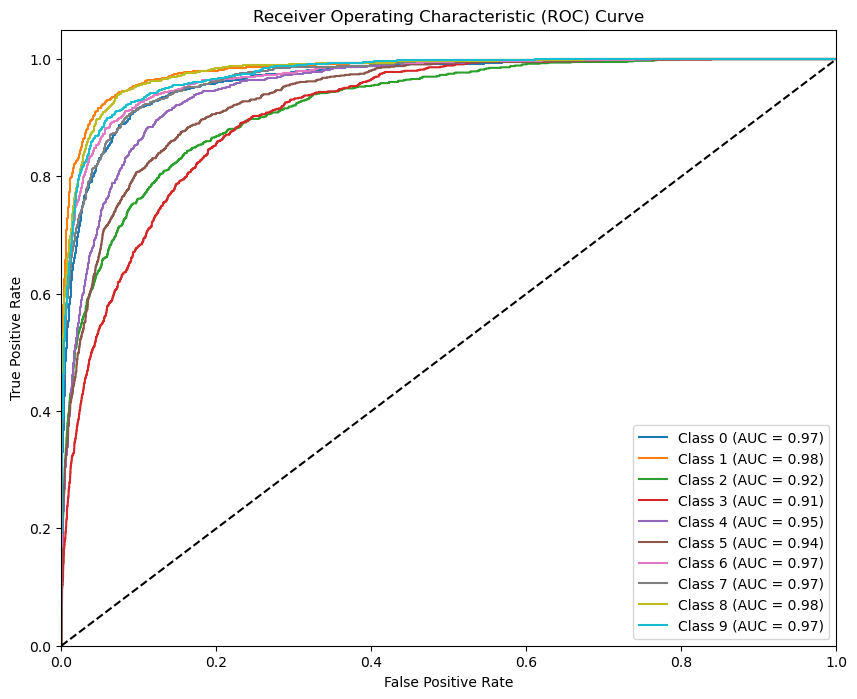

In [14]:
num_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [15]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.90      0.76      0.82      1000
           2       0.63      0.59      0.61      1000
           3       0.54      0.54      0.54      1000
           4       0.64      0.68      0.66      1000
           5       0.61      0.61      0.61      1000
           6       0.74      0.81      0.77      1000
           7       0.74      0.76      0.75      1000
           8       0.80      0.80      0.80      1000
           9       0.77      0.82      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



313/313 [==============================] - 5s 15ms/step


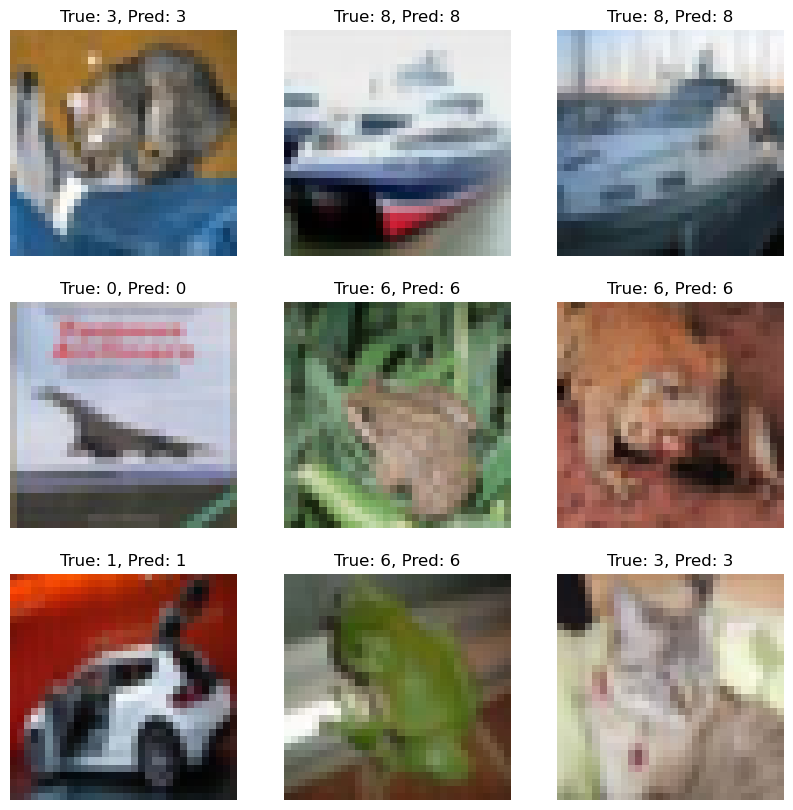

In [16]:
# Get the output from the model for the test set
predictions = cnn_model.predict(x_test)
predictions = np.array(predictions)  # Convert predictions to a numpy array

# Function to plot images with their predictions
def plot_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = labels[i]  # Treating labels[i] as scalar
        predicted_label = np.argmax(predictions[i])
        plt.title(f"True: {true_label}, Pred: {predicted_label}")
        plt.axis('off')
    plt.show()

# Display images with their predicted labels
plot_images(x_test, y_test, predictions)